# How Do Legacy and Low-Cost Carriers Compare in terms of On-Time Performance?

Chan Yi Tian and Sam Lee, 31 January, 2018

|Name|ANR Number|
|:----|:-------|
|Chan Yi Tian|916235|
|Sam Lee|103193|


## Abstract

Air travel is an increasingly ubiquitous means of transportation. [The International Air Transport Association (IATA)](http://www.iata.org/about/pages/index.aspx) expects air travel [demand to double within 20 years](http://www.iata.org/pressroom/pr/Pages/2016-10-18-02.aspx), with up to 7.2 billion passengers travelling in 2035. This exponential growth is partly contributed by the rise of low-cost carriers (LCC), which provide increasingly affordable flight tickets. This is possible as low-cost carriers operate with innovative business models that maximizes the amount of time their planes spend in the air (generating revenue!). However, this practice of scheduling the flights so close to each other may potentially lead to more delays. Therefore, it is interesting for us to compare the on-time performances of legacy airlines and low-cost carriers, in terms of cancellations, diversions, and delays.

We used data from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS), which tracks the on-time performance of domestic flights operated by major carriers. Our dataset was downloaded from [Kaggle](https://www.kaggle.com/giovamata/airlinedelaycauses), and includes data on domestic flights in the year 2008.

Prior to exploring the data, one could safely reason that low cost airlines/small airlines are more likely to perform worse on these indicators of performance. Low cost airlines are more focused on lowering marginal costs than increasing the customer experience. Conversely, high cost airlines are able to charge higher prices based on better customer experience, and would therefore be more likely to pay to avoid delays/cancellations. This is supported by Professor Terence Fan who states that ["the operating model of these airlines lends itself to unpredictability."](http://www.tnp.sg/news/singapore/travellers-beware-delays-budget-carriers-more-likely-says-expert)

Let's find out if the reality matches our perception!

<p><img style="float: left ; margin: 5px 20px 5px 1px;" height="200" src="southwest-airlines-evolution-1024x682.jpg"></p>

## Step 1 - Let's Get Started

We will start by importing the packages needed for data analysis. We will then import our dataset, a two-million-row CSV file, into the Jupyter Notebook. Next, we will inspect the first few rows of the dataset to ensure that the import was carried out correctly. 

In [1]:
# Import the pandas package for data processing
import pandas as pd
# Import the numpy package for data processing
import numpy as np
# Import the matplotlib package for plotting graphs
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
# Import the scipy package for data processing
from scipy import stats
# Import the dataset from the U.S. Department of Transportation
DelayedFlights = pd.read_csv("/Users/chanyitian/DelayedFlights.csv")
# Inspect the first few roles of data
DelayedFlights.head() 

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


As you can see, this is quite a complicated dataset! Let us explain the most important variables required for our analysis. If you are interested in other variables not listed in this table, you can find more information [here](https://www.kaggle.com/giovamata/airlinedelaycauses/data).

|Variables|Description|
|:----|:-------|
|Year|This database consists of domestic flights in USA in the year 2008|
|DepTime|This is the actual departure time|
|CRSDepTime|This is the scheduled departure time|
|ArrTime|This is the actual arrival time|
|CRSArrTime|This is the scheduled arrival time|
|UniqueCarrier|This is unique carrier code (eg. American Airlines is shown as AA)|
|ArrDelay|This is the arrival delay, in minutes|
|DepDelay|This is the departure delay, in minutes|
|Cancelled|Whether the flight was cancelled|
|CancellationCode|The reason for cancellation|
|Diverted|Whether the flight was diverted|
|CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay|Lists the no. of mins attributed to each major causes of delays|

## Step 2 - Creating New Variables

### A. New column: Airline

Let us start with making the dataset more understandable. To the regular audience, the unique carrier code might be quite confusing, as it represents the full airline name (eg. American Airlines) with a two-digit code (eg. AA). Let us replace this confusing code with the actual names of the airline!

In [2]:
# Let's create a lookup dictionary, so that Python can replace each unique carrier code with the actual airline names.
AirlineNames = {'WN' : "Southwest Airlines", 
      'AA' : "American Airlines", 
      'MQ' : "Envoy Air",
      'UA' : "United Airlines",
      'OO' : "SkyWest Airlines",
      'DL' : "Delta Airlines",
      'XE' : "ExpressJet Airlines",
      'CO' : "Continental Airlines",
      'US' : "Piedmont Airlines",
      'EV' : "Atlantic Southeast Airlines",
      'NW' : "Northwest Airlines",
      'FL' : "AirTran Airways",
      'YV' : "Mesa Airlines",
      'B6' : "JetBlue",
      'OH' : "Comair",
      '9E' : "Pinnacle Airlines",
      'AS' : "Alaska Airlines",
      'F9' : "Frontier Airlines",
      'HA' : "Hawaiian Airlines",
      'AQ' : "Aloha Air"
    }
DelayedFlights["Airline"] = DelayedFlights["UniqueCarrier"].map(AirlineNames)
# Let's inspect that the dataset was altered correctly.
DelayedFlights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,Southwest Airlines
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines


As you can see, we now have a new column called 'Airline', which shows the name of the carrier responsible for each flight. The dataset is now more understandable.

### B. New Column: FAADelay

Let's continue by creating a new variable that represents flight delays more accurately. While we have arrival delay (ArrDelay) and departure delay (DepDelay) in minutes, the [Federal Aviation Administration (FAA)](https://www.faa.gov/) only considers a flight to be delayed when it is 15 minutes later than its scheduled time. Let's create a dummy variable, indicating whether a flight matched the technical definition of 'delayed'.

In [3]:
# FAA considers a flight to be delayed if it is 15 mins later than its scheduled time.
DelayedFlights["FAADelay"] = DelayedFlights["ArrDelay"] >= 15
# let's inspect that the dataset was altered correctly.
DelayedFlights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,FAADelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,False
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,False
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,False
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,0,N,0,2.0,0.0,0.0,0.0,32.0,Southwest Airlines,True
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,False


As you can see, we now have a new column called 'FAADelay', which indicates whether the flight was technically delayed.
### C. New Column: LowCost

In order to compare the on-time performance of legacy and low-cost carriers, we must sort the dozens of airlines within our dataset into each of these categories above. For simplicity, we will use the classification adopted by [Skytrax](http://www.worldairlineawards.com/main/about_skytrax.html), a leading international air transport rating organisation.

In [4]:
# Using the reasoning above, we create a lookup dictionary for Python to sort airlines into legacy and low-cost carriers
AirlineLowCost = {'WN' : 1, 
      'AA' : 0, 
      'MQ' : 0,
      'UA' : 0,
      'OO' : 0,
      'DL' : 0,
      'XE' : 0,
      'CO' : 0,
      'US' : 0,
      'EV' : 0,
      'NW' : 0,
      'FL' : 1,
      'YV' : 0,
      'B6' : 1,
      'OH' : 0,
      '9E' : 0,
      'AS' : 0,
      'F9' : 1,
      'HA' : 0,
      'AQ' : 0
    }
DelayedFlights["LowCost"] = DelayedFlights["UniqueCarrier"].map(AirlineLowCost)
DelayedFlights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,FAADelay,LowCost
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,False,1
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,False,1
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,False,1
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,N,0,2.0,0.0,0.0,0.0,32.0,Southwest Airlines,True,1
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,False,1


As you can see, we now have a new column called 'LowCost', which indicates whether the airline is classified as a Low-Cost Carrier.

## Step 3 - Descriptive Statistics

Now that we have created some useful variables in our original dataset, we should start looking at the on-time performance of airlines, in terms of:

|On-Time Performance KPI|
|:----|
|Cancellations|
|Diversions|
|Delays|

We will look at each of these KPI from the following perspectives.

|On-Time Performance KPI|
|:----|
|Industry-wide performance|
|Performance per airline|
|Performance per category (legacy, low-cost carriers)|

### A. Number of Flights by Month

Let's look at the number of flights per month, and represent them graphically.

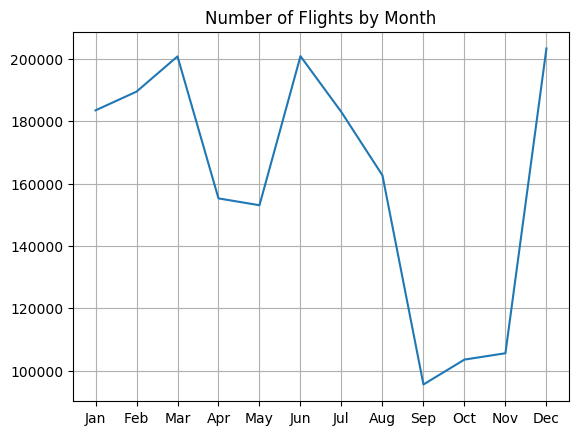

In [5]:
MonthlyFlights = DelayedFlights["Month"].groupby(DelayedFlights["Month"]).value_counts()
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], MonthlyFlights)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.title("Number of Flights by Month")
plt.show()

### B. Airline Size

Let's rank the airlines by size, in terms of number of flights per year, and represent them graphically.

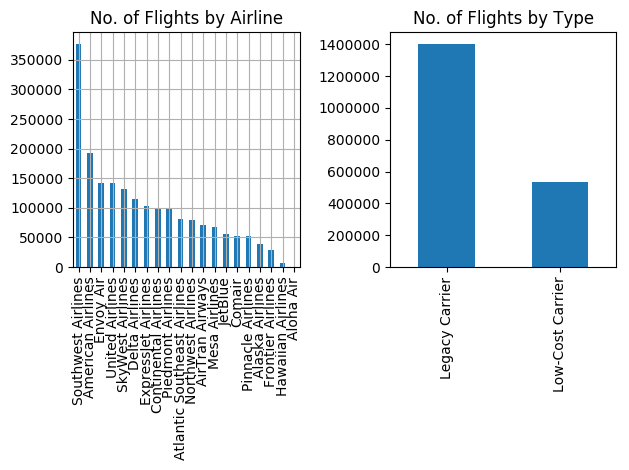

In [23]:
AirlineType = {'WN' : "Low-Cost Carrier", 
      'AA' : "Legacy Carrier", 
      'MQ' : "Legacy Carrier",
      'UA' : "Legacy Carrier",
      'OO' : "Legacy Carrier",
      'DL' : "Legacy Carrier",
      'XE' : "Legacy Carrier",
      'CO' : "Legacy Carrier",
      'US' : "Legacy Carrier",
      'EV' : "Legacy Carrier",
      'NW' : "Legacy Carrier",
      'FL' : "Low-Cost Carrier",
      'YV' : "Legacy Carrier",
      'B6' : "Low-Cost Carrier",
      'OH' : "Legacy Carrier",
      '9E' : "Legacy Carrier",
      'AS' : "Legacy Carrier",
      'F9' : "Low-Cost Carrier",
      'HA' : "Legacy Carrier",
      'AQ' : "Legacy Carrier"
    }
DelayedFlights["AirlineType"] = DelayedFlights["UniqueCarrier"].map(AirlineType)

plt.subplot(1, 2, 1)
DelayedFlights["Airline"].value_counts().plot(kind='bar')
plt.title("No. of Flights by Airline")
plt.grid(True)
plt.subplot(1, 2, 2)
DelayedFlights["AirlineType"].value_counts().plot(kind='bar')
plt.title("No. of Flights by Type")
plt.tight_layout()
plt.show()

### C. Cancellations

Let's look at the number of cancellations on a per-airline basis, followed by a per category basis.

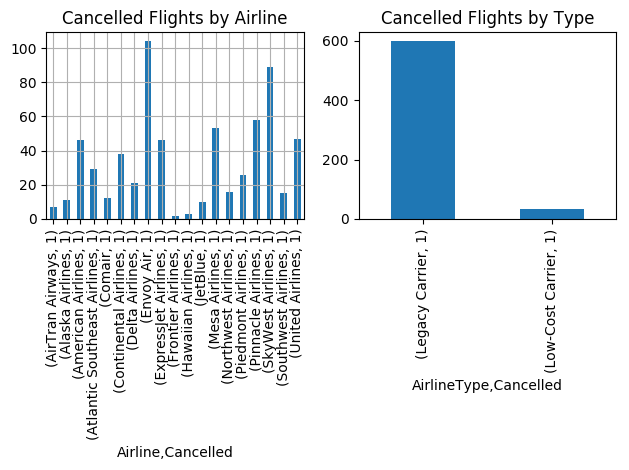

In [7]:
Cancelled = DelayedFlights["Cancelled"]
Cancelled_one = Cancelled[Cancelled == 1]

plt.subplot(1, 2, 1)
Cancelled_one.groupby(DelayedFlights["Airline"]).value_counts().plot(kind='bar')
plt.title("Cancelled Flights by Airline")
plt.grid(True)

plt.subplot(1, 2, 2)
Cancelled_one.groupby(DelayedFlights["AirlineType"]).value_counts().plot(kind='bar')
plt.title("Cancelled Flights by Type")

plt.tight_layout()
plt.show()

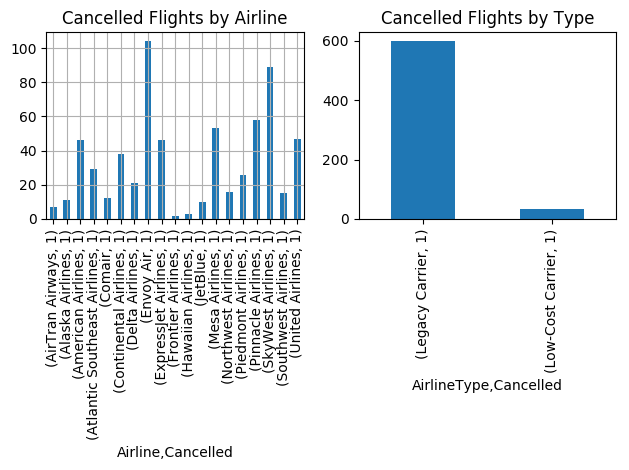

In [8]:
Cancelled = DelayedFlights["Cancelled"]
Cancelled_one = Cancelled[Cancelled == 1]

plt.subplot(1, 2, 1)
Cancelled_one.groupby(DelayedFlights["Airline"]).value_counts().plot(kind='bar')
plt.title("Cancelled Flights by Airline")
plt.grid(True)

plt.subplot(1, 2, 2)
Cancelled_one.groupby(DelayedFlights["AirlineType"]).value_counts().plot(kind='bar')
plt.title("Cancelled Flights by Type")

plt.tight_layout()
plt.show()

### D. Diverted

Let's look at the number of diversions on a per-airline basis, followed by a per category basis.

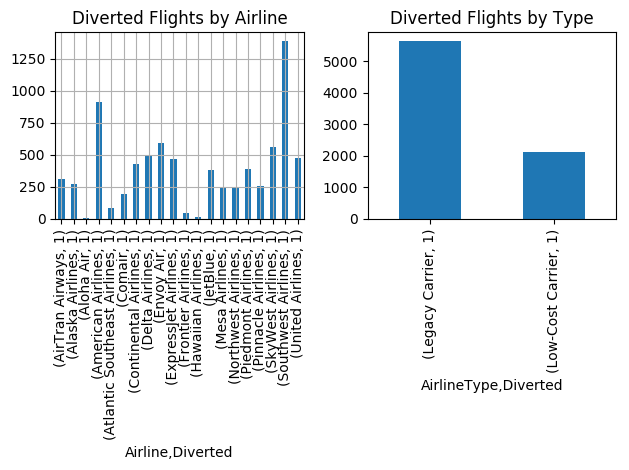

In [9]:
Diverted = DelayedFlights["Diverted"]
Diverted_one = Diverted[Diverted == 1]

plt.subplot(1, 2, 1)
Diverted_one.groupby(DelayedFlights["Airline"]).value_counts().plot(kind='bar')
plt.title("Diverted Flights by Airline")
plt.grid(True)

plt.subplot(1, 2, 2)
Diverted_one.groupby(DelayedFlights["AirlineType"]).value_counts().plot(kind='bar')
plt.title("Diverted Flights by Type")

plt.tight_layout()
plt.show()

### E. Delays

Let us look at the number of flights that matches the FAA's technical definition.

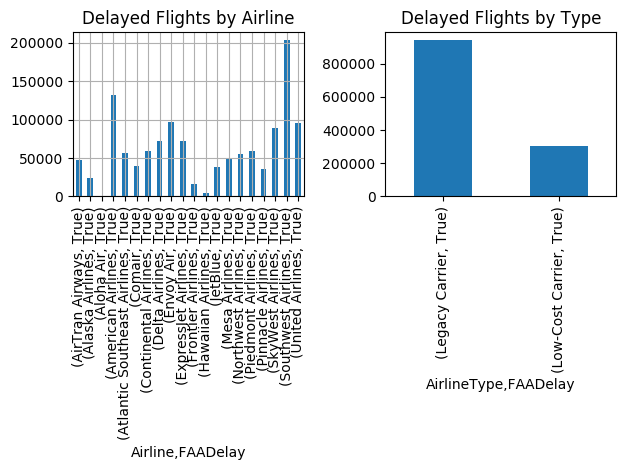

In [10]:
FAADelay = DelayedFlights["FAADelay"]
FAADelay_one = FAADelay[FAADelay == 1]

plt.subplot(1, 2, 1)
FAADelay_one.groupby(DelayedFlights["Airline"]).value_counts().plot(kind='bar')
plt.title("Delayed Flights by Airline")
plt.grid(True)

plt.subplot(1, 2, 2)
FAADelay_one.groupby(DelayedFlights["AirlineType"]).value_counts().plot(kind='bar')
plt.title("Delayed Flights by Type")

plt.tight_layout()
plt.show()

Let us also look at arrival delays (ArrDelay) in terms of minutes, in order to have a better idea of the magnitude of delays.

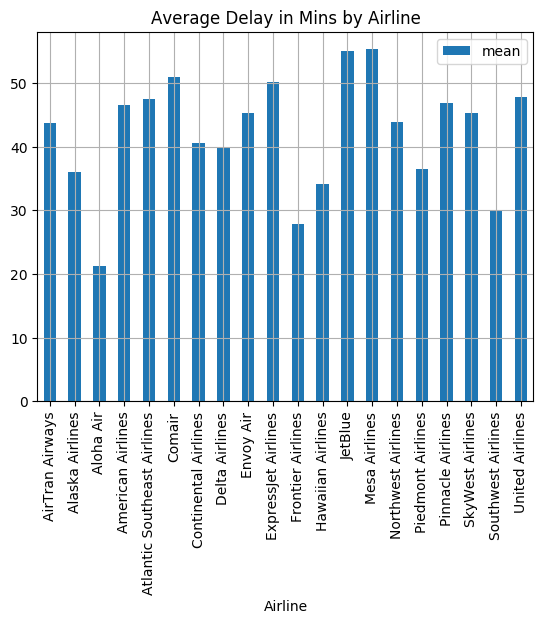

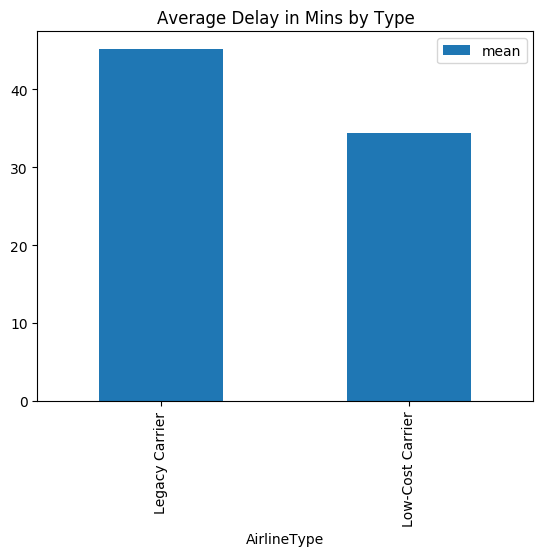

In [11]:
DelayedFlights["ArrDelay"].groupby(DelayedFlights["Airline"]).agg(["mean"]).plot(kind='bar')
plt.title("Average Delay in Mins by Airline")
plt.grid(True)
plt.show()
DelayedFlights["ArrDelay"].groupby(DelayedFlights["AirlineType"]).agg(["mean"]).plot(kind='bar')
plt.title("Average Delay in Mins by Type")
plt.show()

## Step 3 - Let's Analyse the Data

In the previous section, we compared the absolute number of flights that were cancelled, diverted, or delayed. However, as the airlines vary in the number of flights per year, it would be more informative to compare these KPIs in percentage terms. Let's go!

### A. Cancellations

Let us visualize the percentage of flights cancelled by Airline and Airline Classification. We should then conduct a t-test to check if the differences observed across Airline Classification is statistically significant! 

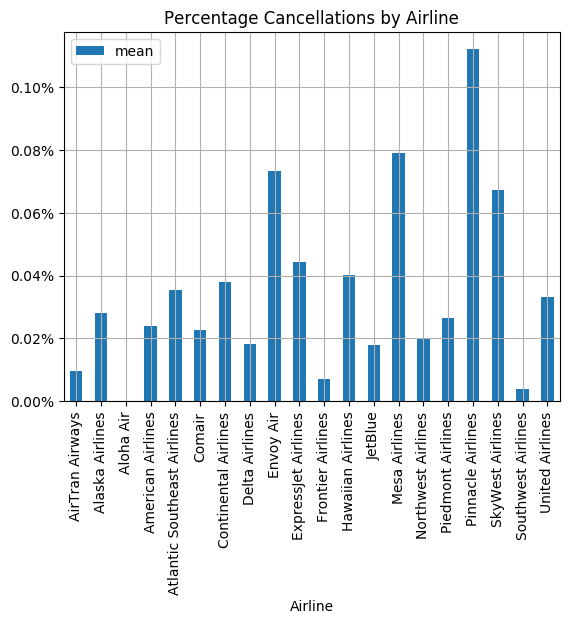

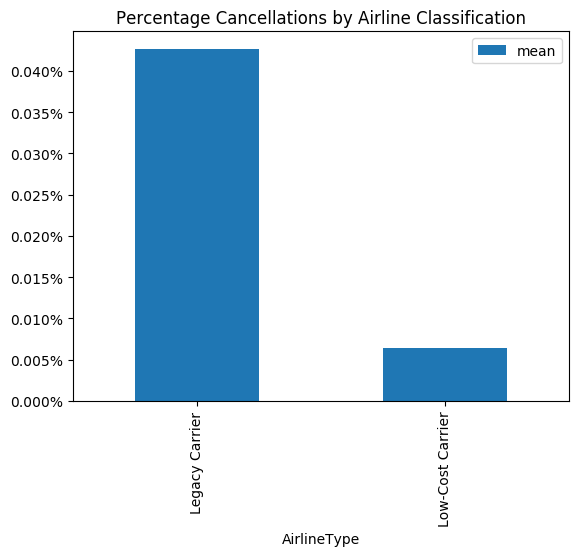

In [12]:
CancellationAirline = DelayedFlights["Cancelled"].groupby(DelayedFlights["Airline"]).agg(["mean"])*100

CancellationAirline.plot(kind='bar')
plt.title("Percentage Cancellations by Airline")
plt.yticks([0.00, 0.02, 0.04, 0.06, 0.08, 0.10],["0.00%", "0.02%", "0.04%", "0.06%", "0.08%", "0.10%"])
plt.grid(True)
plt.show()

CancellationAirlineType = DelayedFlights["Cancelled"].groupby(DelayedFlights["AirlineType"]).agg(["mean"])*100
CancellationAirlineType.plot(kind='bar')
plt.title("Percentage Cancellations by Airline Classification")
plt.yticks([0.000, 0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040],["0.000%", "0.005%", "0.010%", "0.015%", "0.020%", "0.025%", "0.030%", "0.035%", "0.040%"])
plt.show()

In [13]:
LCC_Cancelled = DelayedFlights.loc[DelayedFlights['LowCost'] == 1]
Legacy_Cancelled = DelayedFlights.loc[DelayedFlights['LowCost'] == 0]
stats.ttest_ind(LCC_Cancelled["Cancelled"], Legacy_Cancelled["Cancelled"], axis=0, equal_var=False)

Ttest_indResult(statistic=-17.62388633785541, pvalue=1.6355545354557481e-69)

As we can see in the result above, the p-value is extremely small. This shows that low cost carriers actually perform better in the KPI of flights cancelled!

### B. Diverted

Let us now visualize the percentage of flights diverted by Airline and Airline Classification. We should then conduct a t-test to check if the differences observed across Airline Classification is statistically significant!

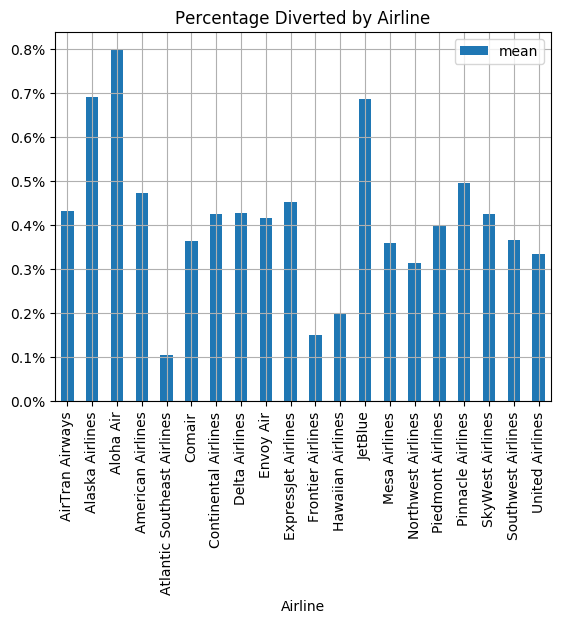

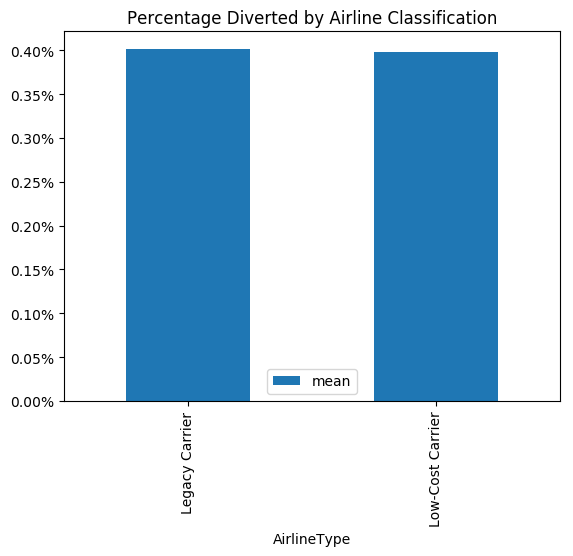

In [14]:
DivertedAirline = DelayedFlights["Diverted"].groupby(DelayedFlights["Airline"]).agg(["mean"])*100
DivertedAirline.plot(kind='bar')
plt.title("Percentage Diverted by Airline")
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],["0.0%", "0.1%", "0.2%", "0.3%", "0.4%", "0.5%", "0.6%", "0.7%", "0.8%"])
plt.grid(True)
plt.show()

DivertedAirlineType = DelayedFlights["Diverted"].groupby(DelayedFlights["AirlineType"]).agg(["mean"])*100
DivertedAirlineType.plot(kind='bar')
plt.title("Percentage Diverted by Airline Classification")
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40],["0.00%", "0.05%", "0.10%", "0.15%", "0.20%", "0.25%", "0.30%", "0.35%", "0.40%"])
plt.show()

In [15]:
LCC_Diverted = DelayedFlights.loc[DelayedFlights['LowCost'] == 1]
Legacy_Diverted = DelayedFlights.loc[DelayedFlights['LowCost'] == 0]
stats.ttest_ind(LCC_Diverted["Diverted"], Legacy_Diverted["Diverted"], axis=0, equal_var=False)

Ttest_indResult(statistic=-0.37790015788350184, pvalue=0.70550484830638194)

As we can see in the result above, the p-value is quite large. This shows that the slight difference obvserved between Legacy Carriers and Low-Cost Carriers are not statistically significant.

### C. Delayed

Let us now visualize the percentage of flights delayed by Airline and Airline Classification, as defined by the FAA. We should then conduct a t-test to check if the differences observed across Airline Classification is statistically significant!

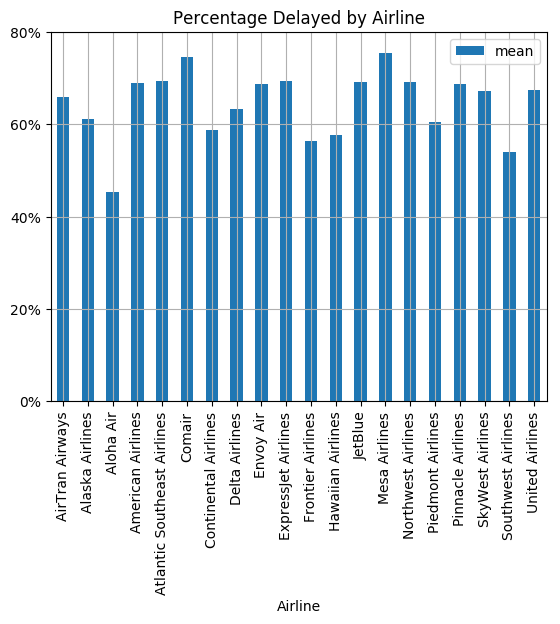

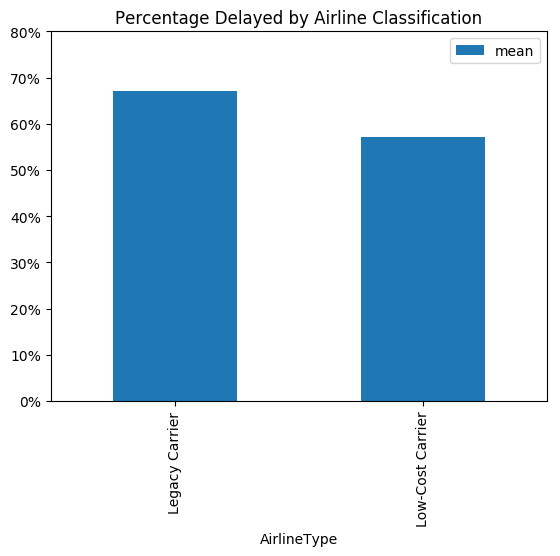

In [16]:
DelayedAirline = DelayedFlights["FAADelay"].groupby(DelayedFlights["Airline"]).agg(["mean"])*100
DelayedAirline.plot(kind='bar')
plt.title("Percentage Delayed by Airline")
plt.yticks([0, 20, 40, 60, 80],["0%", "20%", "40%", "60%", "80%"])
plt.grid(True)
plt.show()

DelayedAirlineType = DelayedFlights["FAADelay"].groupby(DelayedFlights["AirlineType"]).agg(["mean"])*100
DelayedAirlineType.plot(kind='bar')
plt.title("Percentage Delayed by Airline Classification")
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80],["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%"])

plt.show()

Whoa! It appears that most domestic flights in USA either depart or arrive 15 minutes after their scheduled departure or arrival time respectively! Let us check if the difference in performance between Legacy Carrier and Low-Cost Carriers are statistically significant.

In [17]:
LCC_FAADelayed = DelayedFlights.loc[DelayedFlights['LowCost'] == 1]
Legacy_FAADelayed = DelayedFlights.loc[DelayedFlights['LowCost'] == 0]
stats.ttest_ind(LCC_FAADelayed["FAADelay"], Legacy_FAADelayed["FAADelay"], axis=0, equal_var=False)

Ttest_indResult(statistic=-126.14048693338181, pvalue=0.0)

In [18]:
LCC_ArrDelay = DelayedFlights.loc[DelayedFlights['LowCost'] == 1]
Legacy_ArrDelay = DelayedFlights.loc[DelayedFlights['LowCost'] == 0]
stats.ttest_ind(LCC_ArrDelay.dropna()["ArrDelay"], Legacy_ArrDelay.dropna()["ArrDelay"], axis=0, equal_var=False)

Ttest_indResult(statistic=-69.033675107178397, pvalue=0.0)

As we can seem, the differences between Low-Cost Carriers and Legacy Carriers are statistically significant.

### D. In-Depth Analysis of Flight Delays

The average total arrival delay is a useful first step in examining the difference in on-time performance between airlines and airline classifications. However, there are multiple reasons that an airline could be delayed which is independent of carrier quality. For instance, extreme weather conditions or airport security leads to delays out of control to the carrier. The data is able to attribute the amount of the delay to one of the five categories. The table below shows their definitions, as provided by the [FAA](http://aspmhelp.faa.gov/index.php/Types_of_Delay): 

|Delay Classification|Definition|
|:----|:----|
|CarrierDelay|Within the control of the air carrier. (eg. aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew)|
|WeatherDelay|Caused by extreme or hazardous weather conditions|
|NASDelay|Within the control of the National Airspace System (NAS)|
|SecurityDelay|Caused by long lines in excess of 29 minutes at screening areas, etc.|
|LateAircraftDelay|The ripple effect of an earlier delay at downstream airports|

It is important to isolate how much of the delay is due to reasons that are the responsibility of the carrier. One way to examine this is to simply perform a t test on the means of carrier delay for LCC and legacy carriers to find if they are statistically different. However, it may be the case that factors such as weather conditions affect Legacy/LCC carriers more, due to the fact that they fly from different locations which may be more prone to extreme weather conditions etc. Therefore, it is important to examine the relationship between the average total arrival delay for each carrier, and the average carrier delay.

In [19]:
x_axis = DelayedFlights["ArrDelay"].groupby(DelayedFlights["Airline"]).agg(["mean"])
y_axis = DelayedFlights["CarrierDelay"].groupby(DelayedFlights["Airline"]).agg(["mean"])
bubble_size = DelayedFlights.groupby(DelayedFlights["Airline"]).agg(["count"])
col = ["red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "red", "blue", "red", "blue", "blue", "blue", "blue", "blue", "red", "blue"]

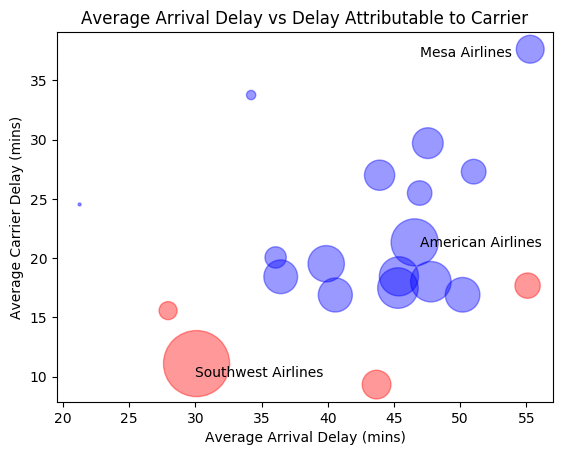

In [20]:
plt.scatter(x = x_axis, y = y_axis, s = np.array(bubble_size["Year"]) * 0.006, c = col, alpha = 0.4)
plt.title("Average Arrival Delay vs Delay Attributable to Carrier")
plt.xlabel("Average Arrival Delay (mins)")
plt.ylabel("Average Carrier Delay (mins)")
plt.text(30,10,"Southwest Airlines")
plt.text(47,37,"Mesa Airlines")
plt.text(47,21,"American Airlines")
plt.show()

The scatterplot above shows the relationship between Average Carrier Delay and Average Arrival Delay, with the size of the circle indicating the size of the airline, and the color of the circle indicating the classification of the airline. Legacy carriers are shown in blue, while Low-Cost Carriers are shown in red.

In order to interpret the scatter plot we can break the graph into four quadrants. The bottom left and top right quadrant is where we would expect most of the carriers. This makes sense mathematically due to the fact that the carrier delay is a component of total arrival delay - low carrier delay would lead to low arrival delay, and vice versa. The top left quadrant indicates that the overall delay was mostly due to the carriers' fault, indicating poor performance. Only two small Legacy carriers are in this quadrant. The bottom right quadrant indicates high average arrival delay times, but low delay attributable to the carrier itself. Carriers in this quadrant are likely to be more influenced by extreme conditions, such as security delays at the airport or extreme weather conditions.

The scatter plot allows us to examine two relationships: classification and size. Firstly, for classification, it appears that for LCC carriers there is no clear relationship between average arrival delay and carrier delay. For the LCC carriers, regardless of arrival delay, the carrier delay is consistently lower than all legacy airlines, with all the means between 9-17 minutes. However, average delay can still be high, meaning LCCs are more susceptible to non-carrier delays/more volatile. For Legacy carriers there is a clear positive relationship which is what is expected, meaning that non-carrier delays are more consistent.

## Step 4 - Conclusion

Our study on different KPIs related to on-time performance of airlines showed the following:

|KPI|Result|
|:----|:-------|
|Cancellations|Low-Cost Carriers perform better in this KPI|
|Diversions|No statistically significant differences were obtained|
|Delays|Low-Cost Carriers perform better in this KPI|

We also conducted additional studies on delays attributable to the carrier, which showed that carrier delay is consistently lower with Low-Cost Carriers.

In conclusion, while low-cost carriers may have a reputation for poor customer experience, our analysis shows that they are actually better performers in terms of punctuality compared to legacy airlines.